In [1]:

####################################################################################################
####################################################################################################

import sys
import glob
import os.path

import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

from IPython.display import display
from IPython.display import Image
from PIL import Image

import keras
from keras import backend as K
from keras import layers
from keras import regularizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model

sys.path.append(os.path.abspath("../../"))
sys.path.append(os.path.abspath("../../pax_utils"))
from s1s2_utils import *

from model_s2integrals_s2waveforms_lstm import *
from get_lstm_data import *



Using TensorFlow backend.


In [11]:

####################################################################################################
# Training Data
####################################################################################################

nEventsTrain = 1000
#nEventsTrain = 3

input_dir  = "../../pax_merge/merged/"
input_file = 'merged_all_0k_test.pkl'
input_path = input_dir + input_file

s2cols = getS2integralsDataFrameColumns()
#print(s2cols)

cols = [
    'event_number',
    'event_s2_count',
    'event_s2_length', 
    'event_s2_left',
    'event_s2_right', 
    'intr_count',
    'intr_corrected_s2_area',
    'intr_s2_electrons',
    'x',
    'y',
    's2_area_000',
    's2_area_001',
    's2_area_002',
    's2_area_003',
    
]

df_events, s2_window_max = getEventsDataFrame(input_path)
df_events                = df_events[0:nEventsTrain][:].copy(deep=True)
df_s2integrals           = df_events[s2cols]

df_events                = df_events[cols]
#df_events                = df_events[0:10][:]


print(df_events.shape)
display(df_events[0:5][:])

print()
print("Event Max S2 Window size: " + str(s2_window_max))
print()
        


(1000, 14)


,event_number,event_s2_count,event_s2_length,event_s2_left,event_s2_right,intr_count,intr_corrected_s2_area,intr_s2_electrons,x,y,s2_area_000,s2_area_001,s2_area_002,s2_area_003
1,1,6,463,105426,105888,1,2102.227029,98.696105,2.626434,-17.960824,1.715228,0.0,0.0,0.000000
3,3,11,613,105663,106275,1,1998.884861,93.844360,10.907536,-6.312277,0.912039,0.0,0.0,1.545933
5,5,8,549,89174,89722,1,1849.278980,86.820609,24.631697,-12.763601,0.000000,0.0,0.0,0.000000
6,6,9,834,110207,111040,1,2118.673278,99.468229,2.726006,37.749081,6.140486,0.0,0.0,9.062252
7,7,17,704,77830,78533,2,4666.111210,219.066254,-21.259064,-4.445240,2.638062,0.0,0.0,3.401293



Event Max S2 Window size: 1448



In [12]:

####################################################################################################
# Training Data
####################################################################################################

train_data, train_truth  = get_data(df_events, s2_window_max)

print()
print("Input data shape:       " + str(train_data.shape ))
print("Truth data shape:       " + str(train_truth.shape))
print()

nRows = train_data.shape[0]
nRows = 3

#for i in range(0, nRows):
#    
#    s2_waveforms    = train_data[i, :, :]
#    s2_integrals    = np.sum(s2_waveforms, axis=0)
#    s2_integrals_df = df_s2integrals[i:i+1][:].as_matrix()
#    
#    sum1 = np.sum(s2_integrals).astype('float32')
#    sum2 = np.sum(s2_integrals_df).astype('float32')
#
#    eq = sum1 == sum2
#    eq = abs(sum1 - sum2) / sum2 < 0.10
#    
#    if (not eq):
#        
#        print()
#        print(i)
#        print("Sum from training data: " + str(sum1))
#        print("Sum from integrals:     " + str(sum2))
#        print()
#        #print(s2_integrals[:][:])
#        #print()
#        #print(s2_integrals_df[:][:])
#    
#    #assert(eq)
#    
#    continue
    
#print()
#test1 = train_data[1,:,:]
#print(test1.shape)
#test2 = np.sum(test1, axis=0)
#print(test2.shape)
#print("S2 integrals: " + str(test2[0:10]))
#test3 = np.sum(test2)
#print("Sum of S2 integrals: " + str(test3))
#
#
##np.sum(, axis=1)
#
##print(test1)
#
##print()
##print(test2.shape)
##print(test2)


0 empty events

Input data shape:       (127000, 1448)
Truth data shape:       (127000, 1)



In [13]:

print(train_truth[0:3][:])


[[ 1.71522784]
 [ 0.        ]
 [ 0.        ]]


In [ ]:

####################################################################################################
####################################################################################################

n_events     = nEventsTrain
n_channels   = 127
n_outputs    = 1
n_timesteps  = s2_window_max
go_backwards = False
unroll       = False


####################################################################################################
# Training Data
####################################################################################################

#train_data  = np.random.random( (n_events, n_timesteps, n_channels) )
#train_truth = np.random.random( (n_events, n_outputs)               )

#train_data = train_data.reshape((n_events*n_channels, 1448, 1))


#train_data  = train_data [ix, :, :]
#train_truth = train_truth[ix, :]

print()
print("Channels:         " + str(n_channels))
print("Timesteps:        " + str(n_timesteps))
print("Outputs:          " + str(n_outputs) )
print("Input data shape: " + str(train_data.shape ))
print("Truth data shape: " + str(train_truth.shape))
print()



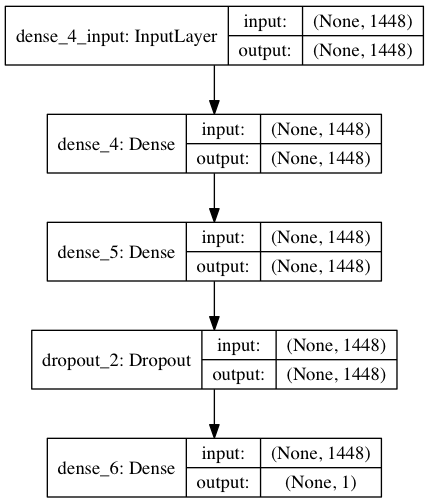

In [ ]:

####################################################################################################
# To Do: understand stateful, return_state
####################################################################################################

#model, name = lstmModel(1, n_timesteps, n_outputs, 'elu', 0.00005, go_backwards, unroll)
model, name = dnnModel(n_timesteps, n_outputs, 'elu', 0.00005)


######################################################################################
######################################################################################

name_png = 'models/' + name + ".png"

print()
display(Image.open(name_png))
print()



In [ ]:

######################################################################################
######################################################################################

model.fit(
    train_data,
    train_truth,
    batch_size=64,
    epochs=5,
    verbose=True
)

print("Training Complete.")


Epoch 1/5
127000/127000 [==============================] - 897s 7ms/step - loss: 9.5866
Epoch 2/5
127000/127000 [==============================] - 881s 7ms/step - loss: 4.1605
Epoch 3/5
 66240/127000 [==============>...............] - ETA: 16:14 - loss: 1.4256

In [10]:

######################################################################################
# Save Model
######################################################################################

folder  = "models/"    
name_h5 = folder + name + ".h5"

model.save(name_h5, overwrite=True)

print(name_h5)


models/model_s2integrals_s2waveforms_dnn_elu.h5
